Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so a dataset has been created, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting, which you prefer and for what cases. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data

### 0. Read in the data 

In [3]:
# Your solution goes here
df = pd.read_csv('chicken.csv')
df

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5
...,...,...,...,...,...
355,22,212,C,2966.5,4
356,22,176,C,3927.9,4
357,22,180,C,3361.6,5
358,22,193,C,3804.4,5


### 1. Weight by diet summary stats (Pandas groupby and describe)

In [4]:
# Your solution goes here
# Group DataFrame by diet and grab summary stats for the weight
df.groupby(['diet']).describe()['weight']

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [5]:
# Your solution goes here
# Group DataFrame by diet and grab summary stats for the eggs
df.groupby(['diet']).describe()['eggs']

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

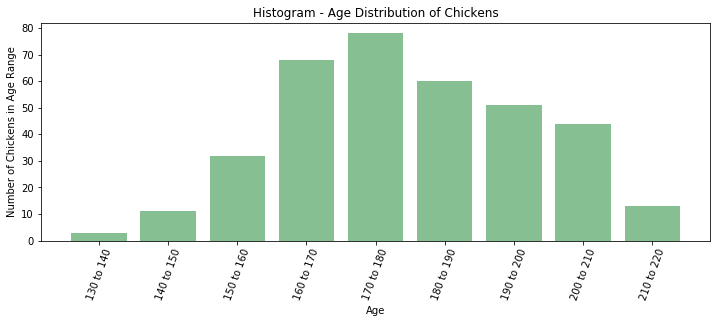

In [6]:
# Your solution goes here
# print(df['age'].min()) # See lowest value in age column
# print(df['age'].max()) # See highest value in age column

# Create an array of histogram plots based on the age column, with 9 bins
# Rotate x-axis labels by 70 degrees, reduce bar width to 80%, remove grid, change color to green, adjust figure size
age_hist = df.hist(column='age', bins=9, range=[130, 220], xrot=70, rwidth=0.8, align='left', grid=False, color='#86bf91',
                  figsize=(12,4))
# print(type(age_hist)) # Check type of age_hist
# Create an array of custom labels to be used for ticks on x-axis in histogram
x_labels = ['130 to 140', '140 to 150', '150 to 160', '160 to 170', '170 to 180', '180 to 190', '190 to 200', '200 to 210',
          '210 to 220']

# .flatten() returns a copy of the numpy array array collapsed into one dimension - needed since age_hist is currently a 2-D 
# numpy array
# for each plot in the flattened age_hist array of plots...
for ax in age_hist.flatten(): 
    ax.set_title("Histogram - Age Distribution of Chickens") # Add title to plot
    ax.set_xlabel("Age") # Add age label to x-axis
    ax.set_ylabel("Number of Chickens in Age Range") # Add number of chickens label to y-axis
    ax.set_xticks(np.arange(130, 220, 10)) # Establish range and steps for ticks on x-axis
    ax.set_xticklabels(x_labels) # Overwrite tick labels on x-axis with strings in x_labels array

### 3.2 Histogram of age of chickens (Seaborn distplot())

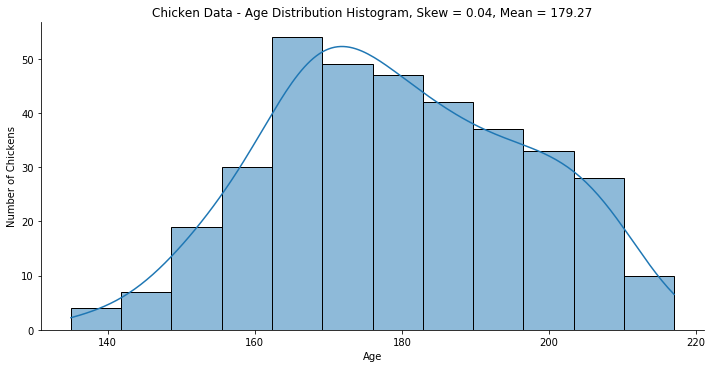

In [7]:
# Your solution goes here
age_skew = df['age'].skew() # Measurement of the asymmetry of the age distribution
age_mean = df['age'].mean() # Mean of the age distribution
fig = sns.displot(data=df, x="age", kde=True, aspect=2) # Create seaborn displot with a histogram and kernel density estimate
fig.set_axis_labels("Age", "Number of Chickens") # Assign age and number of chickens as the axis labels
fig.set(title=f'Chicken Data - Age Distribution Histogram, Skew = {age_skew:.2f}, Mean = {age_mean:.2f}') # Set title of plt

### 4.1 Boxplot age (Pandas boxplot())

Text(0, 0.5, 'Age')

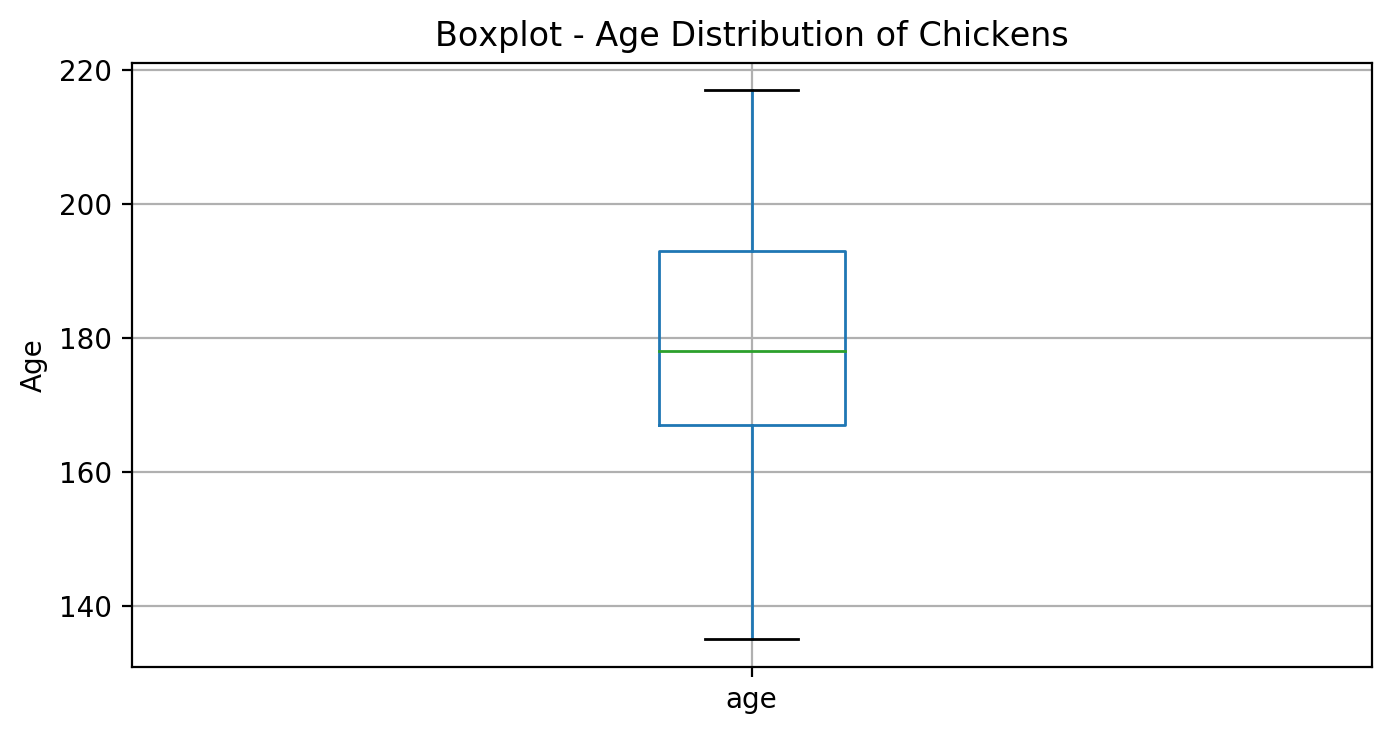

In [8]:
# Your solution goes here
# Set size and resolution of plot
plt.figure(figsize=(8, 4), dpi=200)
# Create a Pandas boxplot for the distribution of values in age column
boxplot = df.boxplot(column=['age'])
# print(type(boxplot)) # Matplotlib Axes Subplot
boxplot.set_title("Boxplot - Age Distribution of Chickens") # Set title of boxplot
boxplot.set_ylabel("Age") # Add age label to y-axis

### 4.2 Boxplot age (Seaborn boxplot())

Text(0.5, 0, 'Age')

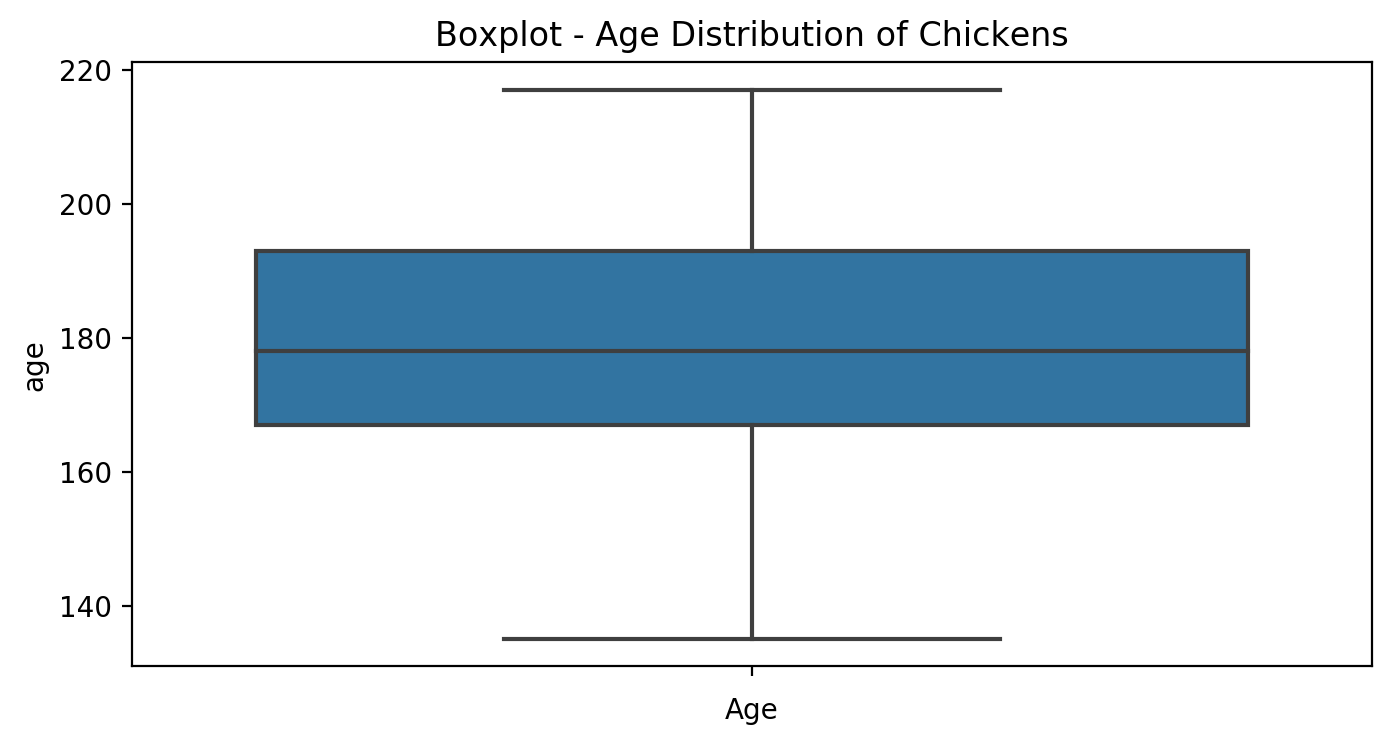

In [9]:
# Your solution goes here
# Set size and resolution of plot
plt.figure(figsize=(8, 4), dpi=200)
# Create a Seaborn boxplot for the distribution of values in age column
sea_boxplot = sns.boxplot(y=df["age"])
sea_boxplot.set_title("Boxplot - Age Distribution of Chickens") # Set title of boxplot
sea_boxplot.set_xlabel("Age") # Add age label to x-axis

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

diet        A        B        C
week                           
0     3069.50  2962.86  3054.49
2     3162.29  3028.41  3115.87
4     3257.86  3095.40  3178.51
6     3356.32  3163.87  3242.40
8     3457.77  3233.86  3307.55
10    3562.28  3305.40  3374.05
12    3669.95  3378.53  3441.86
14    3780.88  3453.25  3511.05
16    3895.17  3529.65  3581.60
18    4012.89  3607.72  3653.61
20    4134.19  3687.54  3727.04
22    4259.13  3769.10  3801.95


Text(0, 0.5, 'Weeks')

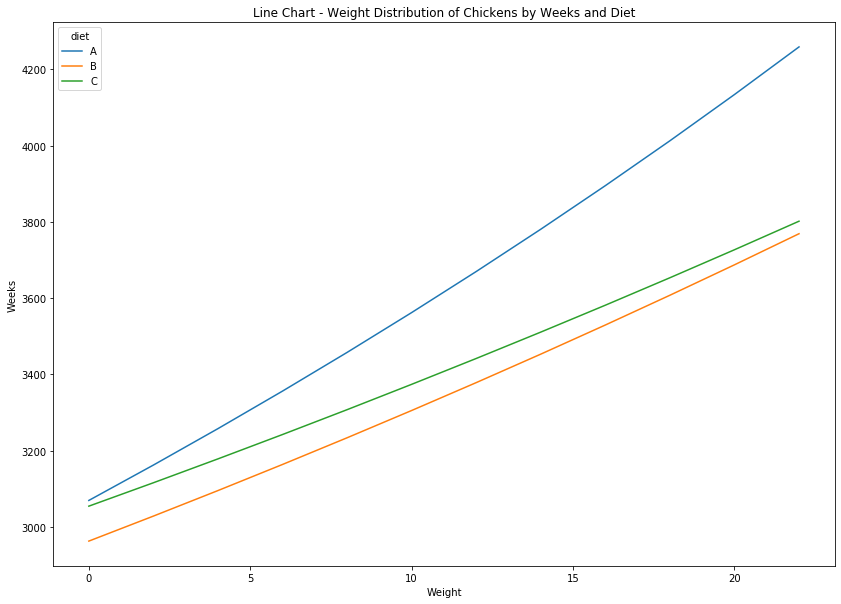

In [10]:
# Your solution goes here
# Group DataFrame by Week and Diet and grab mean stats for the weight
mean_weight_df = df.groupby(['week', 'diet']).mean()['weight']
# Move diet to the top of the DataFrame
unstacked_df = mean_weight_df.unstack(level=-1)
# Print unstacked DataFrame to confirm it does what I wanted it to
print(unstacked_df)
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14,10))
# Plot unstacked_df as a line chart
unstacked_df.plot(ax=ax, kind='line')
ax.set_title("Line Chart - Weight Distribution of Chickens by Weeks and Diet") # Add title to plot
ax.set_xlabel("Weight") # Add weight label to x-axis
ax.set_ylabel("Weeks") # Add weeks label to y-axis

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

Text(0, 0.5, 'Weight')

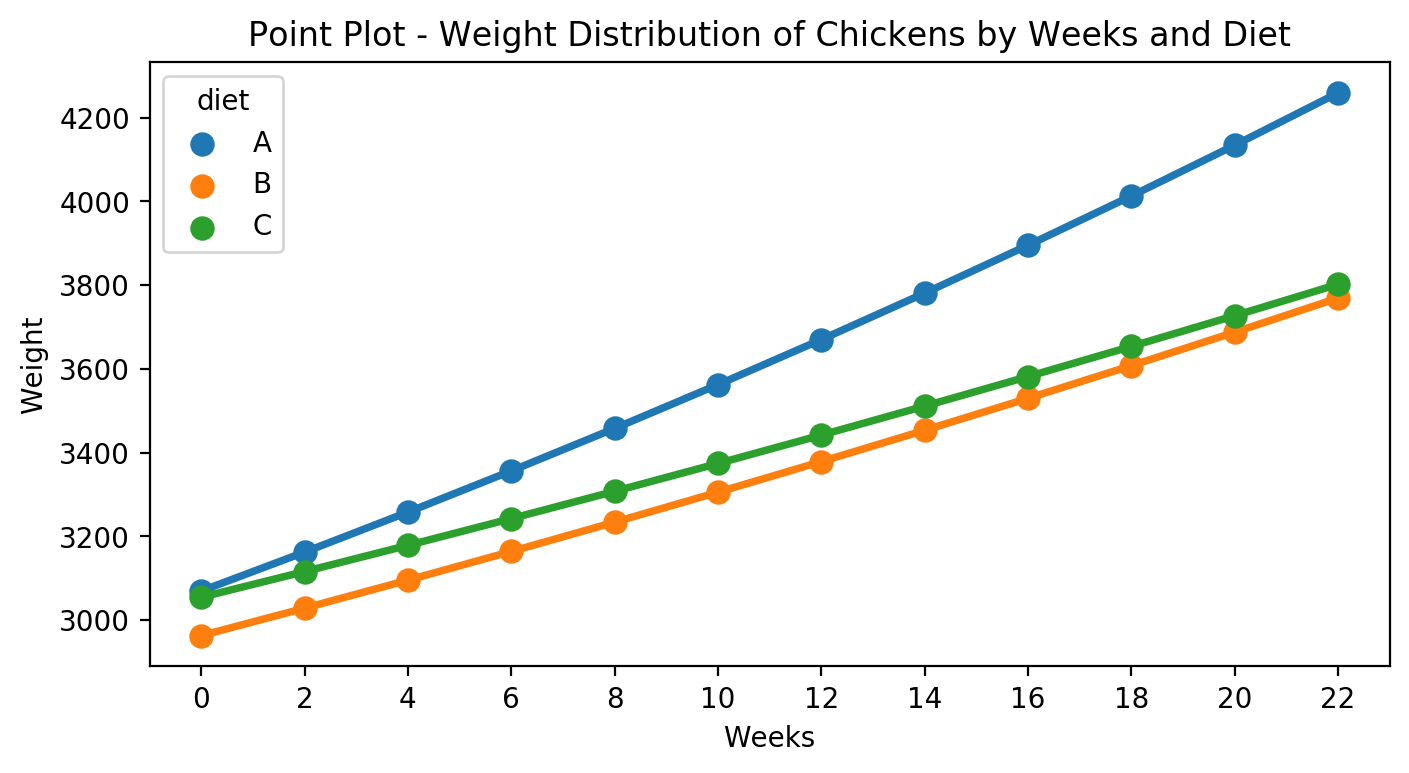

In [11]:
# Your solution goes here
# Set size and resolution of plot
plt.figure(figsize=(8, 4), dpi=200)
# Create a Seaborn pointplot for weight vs weeks by diet
pointplot = sns.pointplot(data=df, x="week", y="weight", hue="diet", ci=None)
pointplot.set_title("Point Plot - Weight Distribution of Chickens by Weeks and Diet") # Add title to plot
pointplot.set_xlabel("Weeks") # Add weeks label to x-axis
pointplot.set_ylabel("Weight") # Add  weight label to x-axis

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

diet    A    B    C
week               
0     4.6  4.4  4.6
2     4.5  3.8  4.2
4     4.6  4.2  4.0
6     4.4  4.2  4.1
8     4.2  3.9  4.3
10    4.6  3.9  4.2
12    4.3  3.9  4.0
14    4.6  4.1  4.2
16    4.3  4.0  4.0
18    4.4  4.0  4.3
20    4.7  4.0  4.0
22    4.6  4.0  4.2


Text(0, 0.5, 'Weeks')

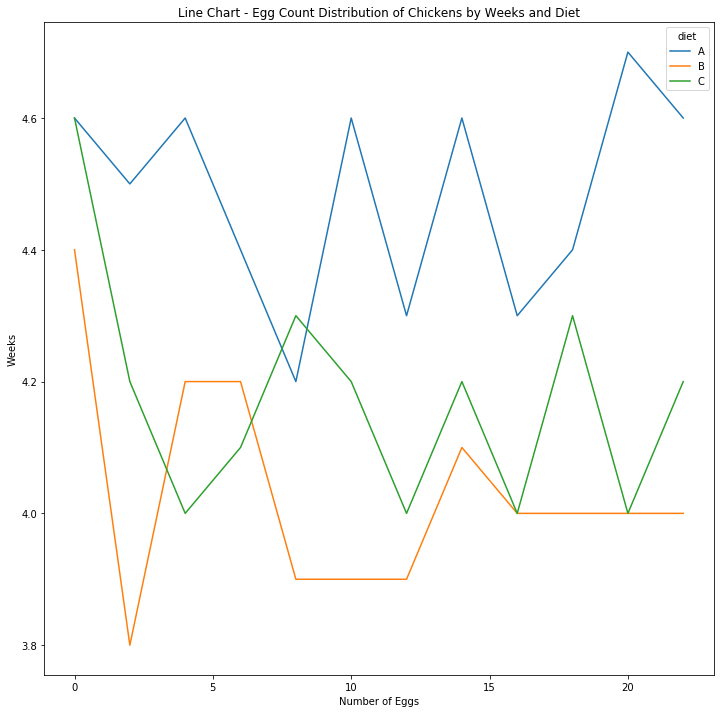

In [12]:
# Your solution goes here
# Group DataFrame by Week and Diet and grab mean stats for the Eggs
mean_eggs_df = df.groupby(['week', 'diet']).mean()['eggs']
# Move diet to the top of the DataFrame
unstacked_df = mean_eggs_df.unstack(level=-1)
# Print unstacked DataFrame to confirm it does what I wanted it to
print(unstacked_df)
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12,12))
# Plot unstacked_df as a line chart
unstacked_df.plot(ax=ax, kind='line')
ax.set_title("Line Chart - Egg Count Distribution of Chickens by Weeks and Diet") # Add title to plot
ax.set_xlabel("Number of Eggs") # Add Number of Eggs label to x-axis
ax.set_ylabel("Weeks") # Add Weeks label to y-axis


### 6.2 Plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

Text(0, 0.5, 'Eggs')

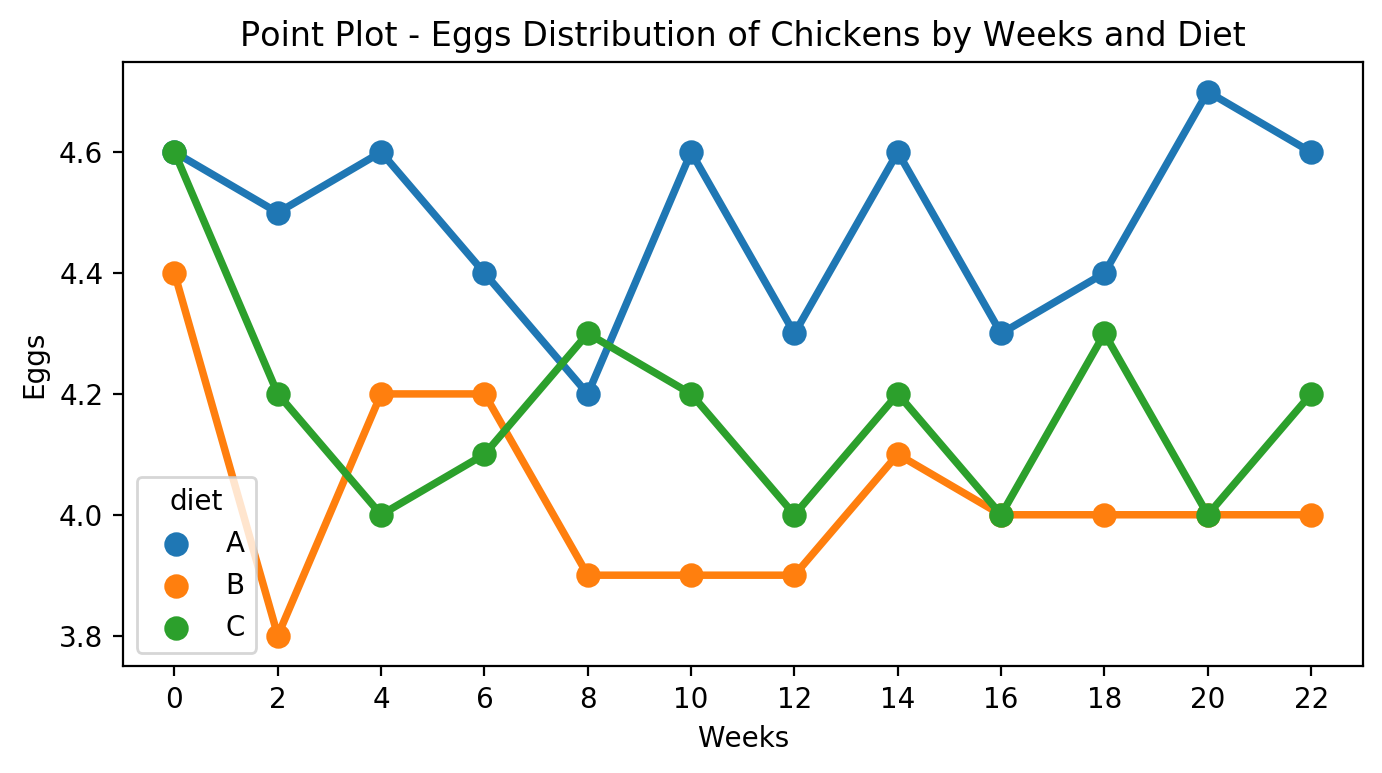

In [13]:
# Your solution goes here
# Set size and resolution of plot
plt.figure(figsize=(8, 4), dpi=200)
# Create a Seaborn pointplot for eggs vs weeks by diet
pointplot = sns.pointplot(data=df, x="week", y="eggs", hue="diet", ci=None)

pointplot.set_title("Point Plot - Eggs Distribution of Chickens by Weeks and Diet") # Add title to plot
pointplot.set_xlabel("Weeks") # Add weeks label to x-axis
pointplot.set_ylabel("Eggs") # Add Eggs label to y-axis

### 7. Average age by diet stats (Pandas groupby())

In [14]:
# Your solution goes here
# Group DataFrame by Diet and grab mean stats for the Age
mean_age_df = df.groupby(['diet']).mean()['age']
mean_age_df

diet
A    166.5
B    187.9
C    183.4
Name: age, dtype: float64

### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


Text(0, 0.5, 'Eggs')

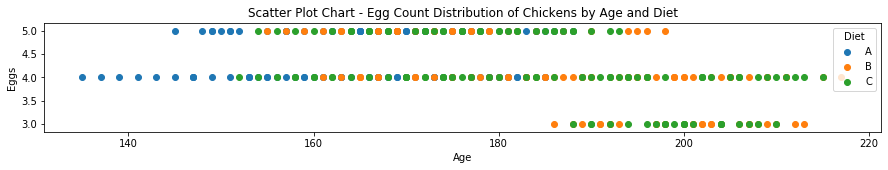

In [15]:
# Your solution goes here
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15,2))
# For each diet name and diet data in the DataFrame grouped by diet...
for diet_name, diet_group in df.groupby(['diet']):
    # Create a scatter subplot using the age and egg data for each diet
    ax.scatter(x='age', y='eggs', data=diet_group, label=diet_name)
ax.legend(title="Diet") # Add legend
ax.set_title("Scatter Plot Chart - Egg Count Distribution of Chickens by Age and Diet") # Add title to plot
ax.set_xlabel("Age") # Add age label to x-axis
ax.set_ylabel("Eggs") # Add eggs label to y-axis

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


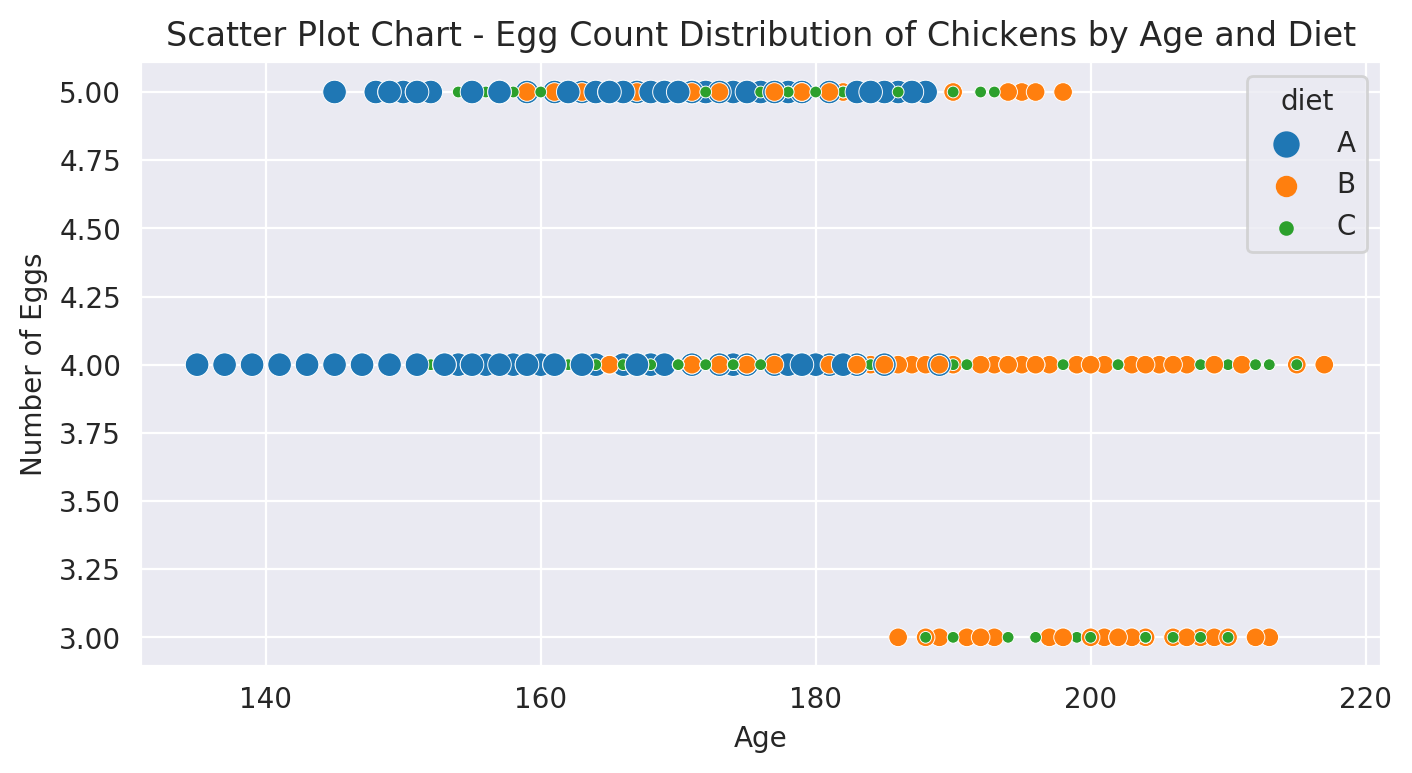

In [16]:
# Your solution goes here
plt.figure(figsize=(8, 4), dpi=200)

# Set seaborn styling on a single chart
with sns.axes_style('darkgrid'):
  # Create a Seaborn scatter plot for eggs vs age by diet
  ax = sns.scatterplot(data=df,
                        x='age',
                        y='eggs',
                        hue='diet',
                        size='diet')
  # Add axis labels and a title to the plot
  ax.set(ylabel='Number of Eggs', 
         xlabel='Age',
         title="Scatter Plot Chart - Egg Count Distribution of Chickens by Age and Diet")

### 9.1 Boxplot age by diet (Pandas boxplot())

Text(0, 0.5, 'Age')

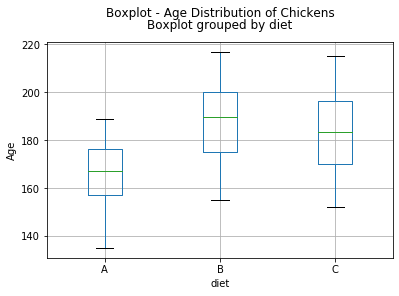

In [17]:
# Your solution goes here
# Create a Pandas boxplot for the distribution of values in age column, separated by diet
boxplot = df.boxplot("age", by="diet")
boxplot.set_title("Boxplot - Age Distribution of Chickens", pad=25) # Add title to plot
boxplot.set_ylabel("Age") # Add age label to y-axis
# print(type(boxplot)) # Check type of boxplot - Matplotlib Axes Subplot

### 9.2 Boxplot age by diet (Seaborn boxplot())

Text(0, 0.5, 'Age')

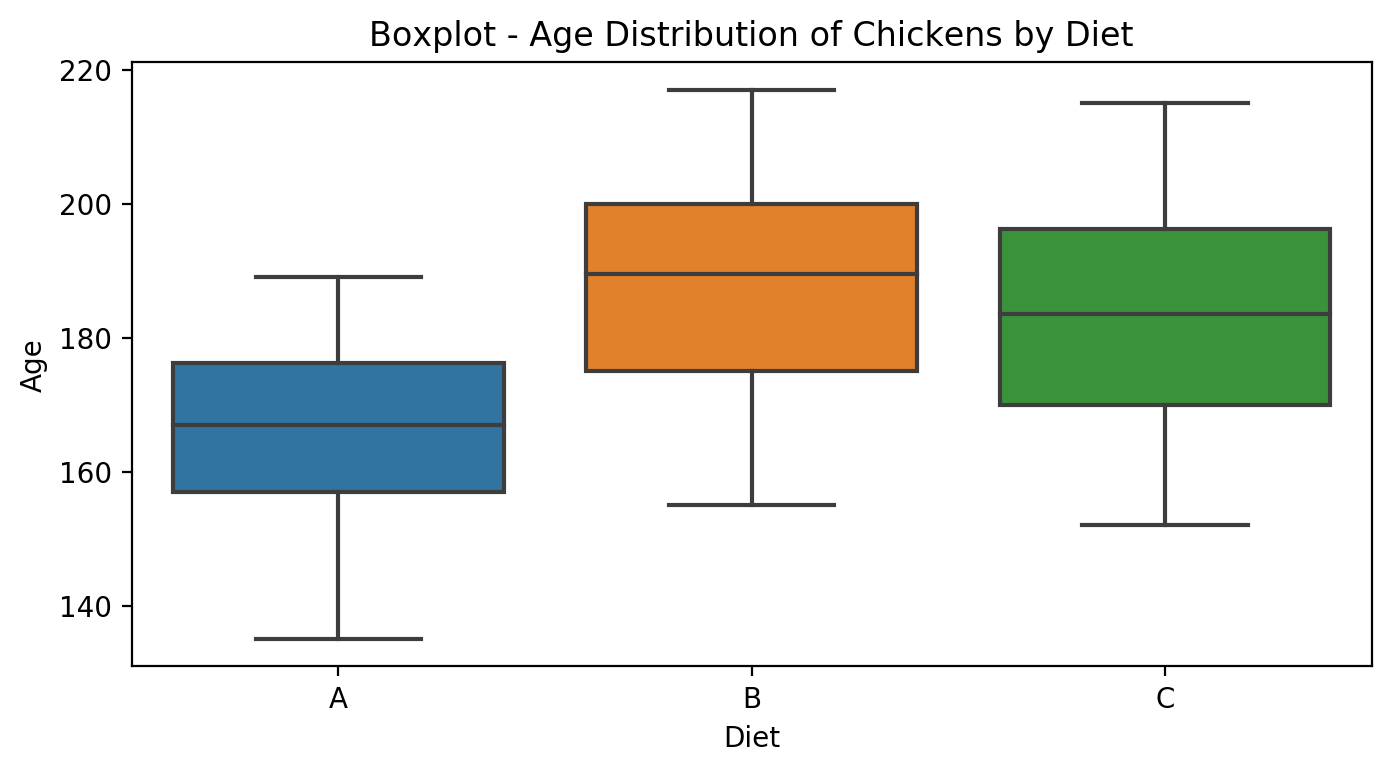

In [18]:
# Your solution goes here
# Set size and resolution of plot
plt.figure(figsize=(8, 4), dpi=200)
# Create a Seaborn boxplot for the distribution of values in age column, separated by diet
sea_boxplot = sns.boxplot(data=df, x="diet", y="age")
sea_boxplot.set_title("Boxplot - Age Distribution of Chickens by Diet")
sea_boxplot.set_xlabel("Diet") # Add diet label to x-axis
sea_boxplot.set_ylabel("Age") # Add age label to y-axis

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when would you use Seaborn?

**Your answers can go here:**
1. The biggest strengths of Pandas for plotting include the groupby() and plot() functions. The groupby() function allows individuals to group the data by one or multiple columns, and the resulting DataFrame can be printed and viewed to ensure the table is correct. The unstack() function can also be used to rearrange the groups as columns if needed. The plot() function provides many options when it comes to the type of plot the user wishes to create - line plots, vertical and horizontal bar plots, histograms, boxplots, kernal density estimation plots, area plots, pie plots, and scatter plots. A weakness of Pandas is that creating plots can be more time-consuming and require more code, since groupby() and unstack() create separate DataFrames from the original. It can also be difficult to switch between different kinds of plots, since different kind of plots will require different parameters and will require reading more documentation.
2. Seaborn plots are more advantageous than Pandas in that they are more aesthetically and visually pleasing compared to Pandas plots, and there are more font and colour options to choose from. In the Pandas and Seaborn line charts above, the Seaborn plot has the data points marked, while the Pandas line chart does not. Seaborn plots can also be created directly from the original DataFrame, and do not require the creation of more DataFrames using groupby() or stack(). The hue parameter for Seaborn can be used to split data neatly into separate groups without having to use groupby(), unlike Pandas. While only the original DataFrame is needed for a Seaborn plot, a disadvantage of Seaborn plots are that they require the original DataFrame to have clean data, if the user chooses to use the original DataFrame.
3. Using Pandas is convenient if the user is not concerned about the aesthetics and visuals of the plots they are building, as Pandas plots are quick and basic. If the user doesn't mind using groupby() and unstack() to create separate DataFrames and experiment, using Pandas can be a good choice to create plots from these new DataFrames. Using Seaborn is convenient if the user is already given a clean DataFrame, as the x, y, and hue parameters can easily split data neatly into separate groups without using groupby() and unstack(), which requires less code and is less time-consuming.






